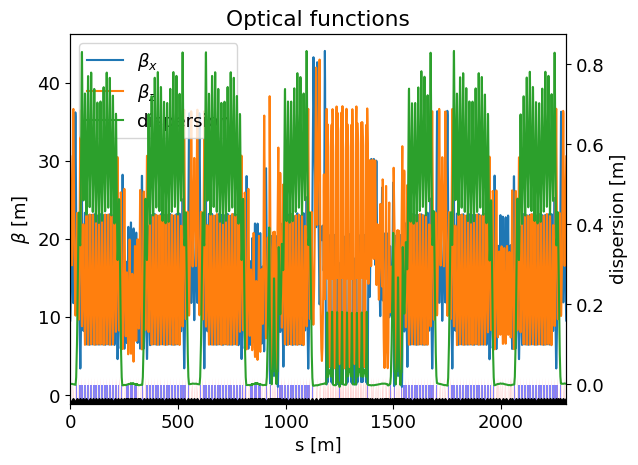

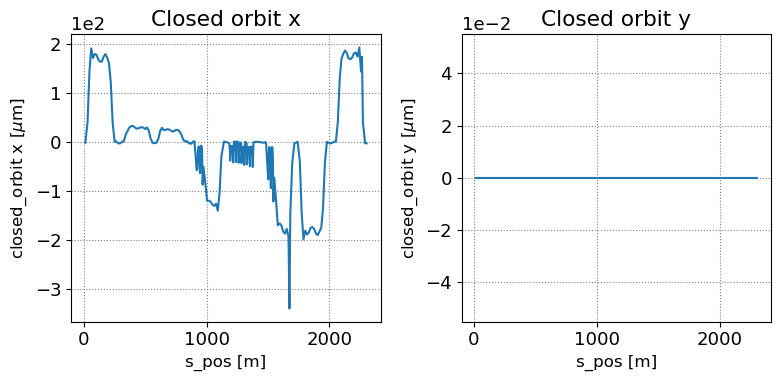

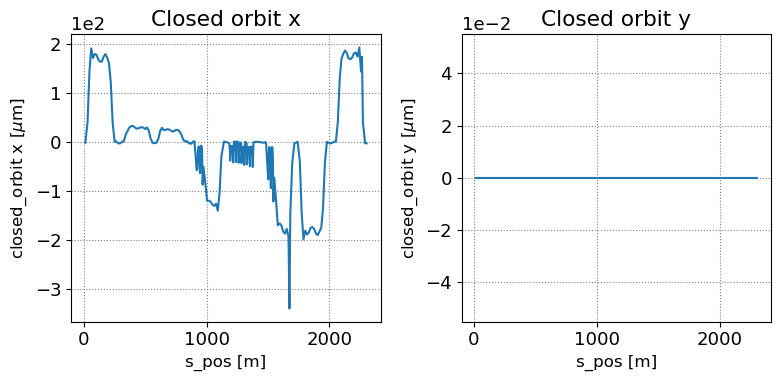

The lattice p3_v24 has 246 BPMs, 620 Correctors, 4446 Dipoles, and 417 quadrupoles. Number of used correctors = 96
The ideal lattice tune values: [37.13544682 30.27906265  0.04718783], The chromaticity values: [-0.19612206 -0.19407061 -0.03356432]. 


In [4]:
lattice_name = 'p3_v24'
from at_modules_loco2 import *
ring = at.load_mat(lattice_name)
ring.plot_beta()
ring.radiation_off()
quads_indices = get_refpts(ring,at.elements.Quadrupole)
bpm_indices = get_refpts(ring, at.elements.Monitor)
corrector_indices= get_refpts(ring , at.elements.Corrector)
dipole_indices = get_refpts(ring, elements.Dipole)
sext_indexes = get_refpts(ring,at.elements.Sextupole)
ORM_230426_3 =  np.loadtxt("ORM_230426_3.txt")
ORM_230426_1 =  np.loadtxt("ORM_230426_1.txt")
ORM_230426_2 =  np.loadtxt("ORM_230426_2.txt")
# measured ORM
Noise_BPMx_230426_3 =  np.loadtxt("Noise_BPMx_230426_3.txt")
Noise_BPMy_230426_3 =  np.loadtxt("Noise_BPMy_230426_3.txt")
Noise_BPMx_230426_1 =  np.loadtxt("Noise_BPMx_230426_1.txt")
Noise_BPMy_230426_1 =  np.loadtxt("Noise_BPMy_230426_1.txt")
Noise_BPMx_230426_2 =  np.loadtxt("Noise_BPMx_230426_2.txt")
Noise_BPMy_230426_2 =  np.loadtxt("Noise_BPMy_230426_2.txt")
BPM_names = load_names("BPM_names.txt")
HCM_names = load_names("HCM_names.txt")
VCM_names = load_names("VCM_names.txt")
hcm_index =[]
for i in HCM_names:
    hcm_index.append(get_refpts(ring, i))
vcm_index=[]
for i in VCM_names:
    vcm_index.append(get_refpts(ring, i))
 # Jacobian calculated using HCM / VCM
ring.enable_6d()
at.set_rf_frequency(ring)
at.set_cavity_phase(ring)
bpm_indices = get_refpts(ring, at.elements.Monitor)
rmsx_err, rmsy_err = rms_orbits(ring, bpm_indices, makeplot = True)
#ring.tapering(niter=3, quadrupole=True, sextupole=True)
rmsx_err, rmsy_err = rms_orbits(ring, bpm_indices, makeplot = True)
[elemdata0, beamdata, elemdata] = at.get_optics(ring, bpm_indices)
twiss = elemdata
print('The lattice {} has {} BPMs, {} Correctors, {} Dipoles, and {} quadrupoles. Number of used correctors = {}'.format(lattice_name, len(bpm_indices), len(corrector_indices), len(dipole_indices), len(quads_indices), len(HCM_names)+len(VCM_names)))
nominal_tune = get_tune(ring, get_integer=True)
print(f"The ideal lattice tune values: {nominal_tune}, "
      f"The chromaticity values: {get_chrom(ring)}. ")
correctors_kick = 1.e-3
dk = 1.e-4 # change in quads strengths for

# Fitting

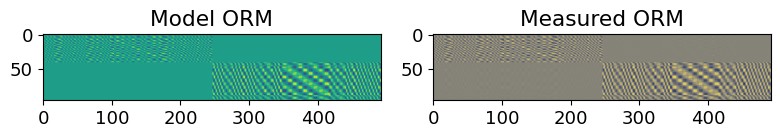

[[0.00356713 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00852905 0.         ... 0.         0.         0.        ]
 [0.         0.         0.02389294 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.29328769 0.         0.        ]
 [0.         0.         0.         ... 0.         0.03028215 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02460973]]


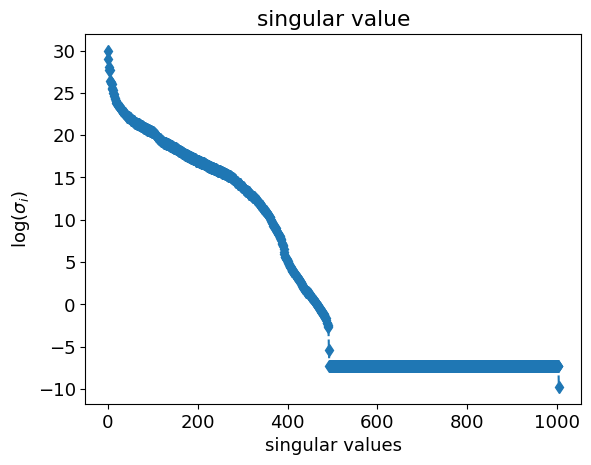

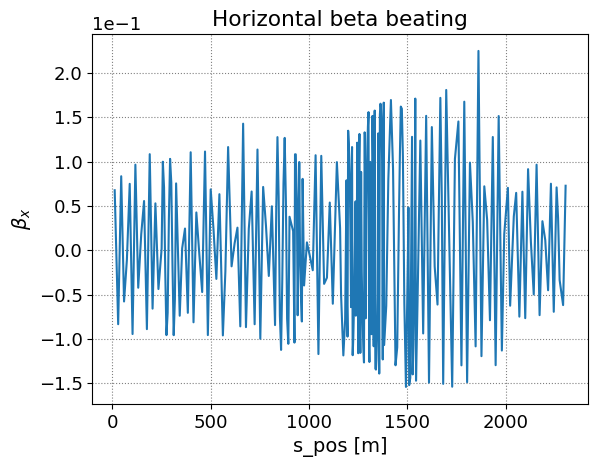

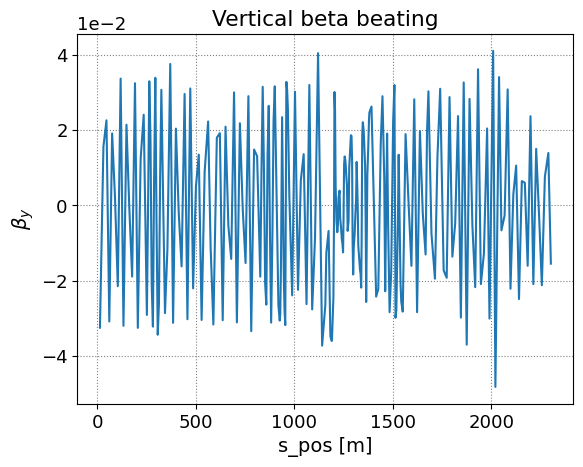

RESULTS:
 Hor beta beating 9.426461419922383 % Ver beta beating 2.122160922636618


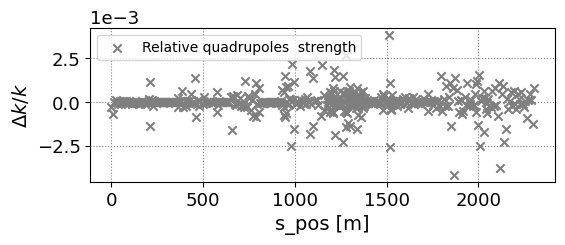

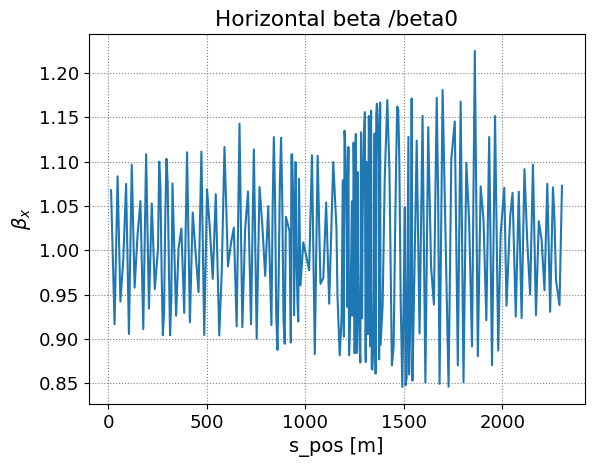

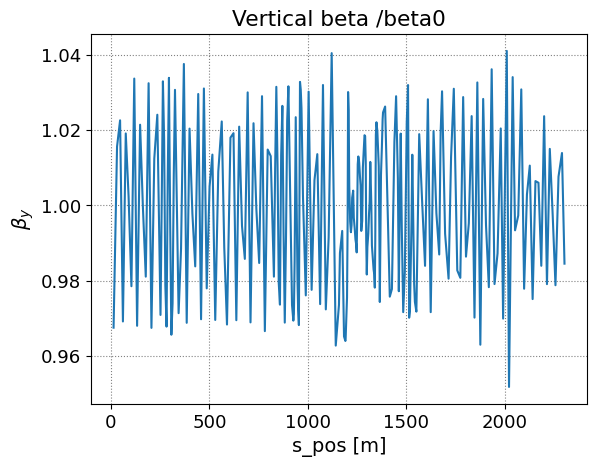

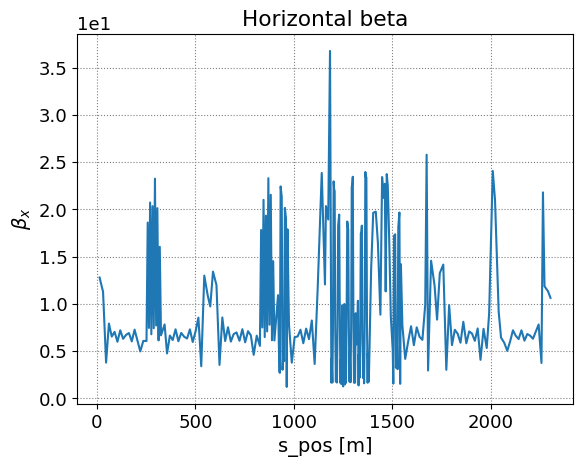

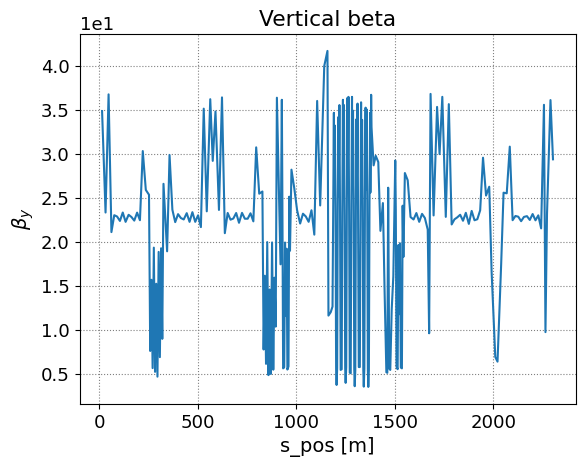

 BPM_to_corrector_response_matrices (Model) ..


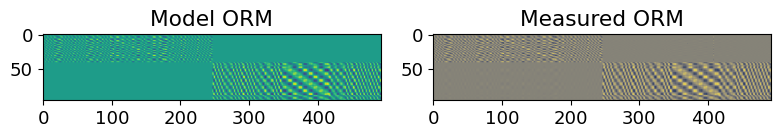

[[0.00356713 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00852905 0.         ... 0.         0.         0.        ]
 [0.         0.         0.02389294 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.29328769 0.         0.        ]
 [0.         0.         0.         ... 0.         0.03028215 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02460973]]


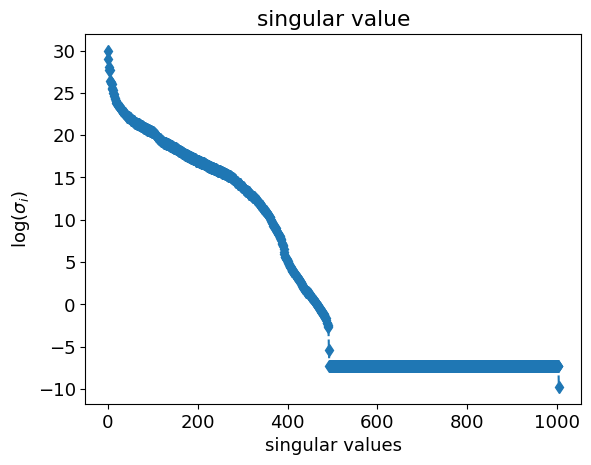

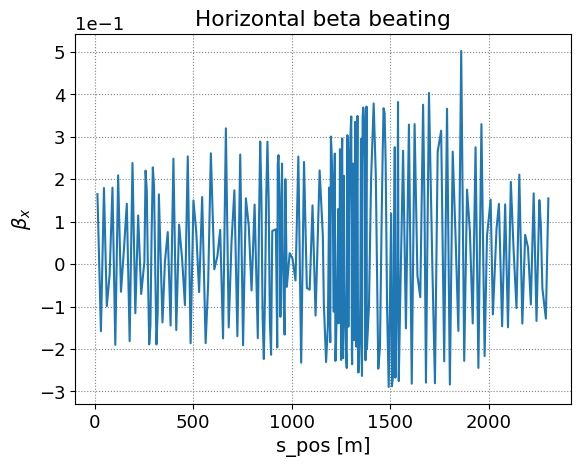

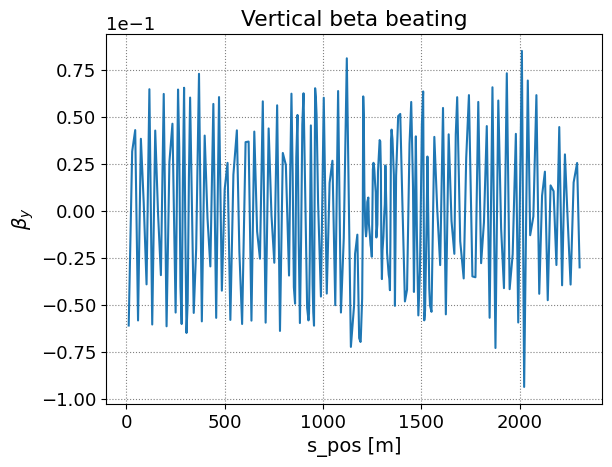

RESULTS:
 Hor beta beating 19.9225898599822 % Ver beta beating 4.137549997765584


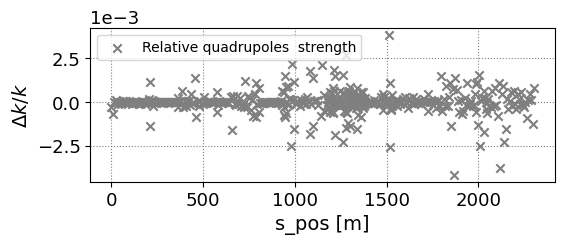

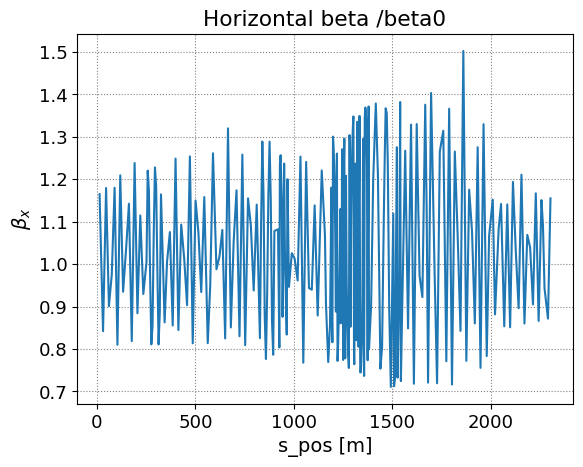

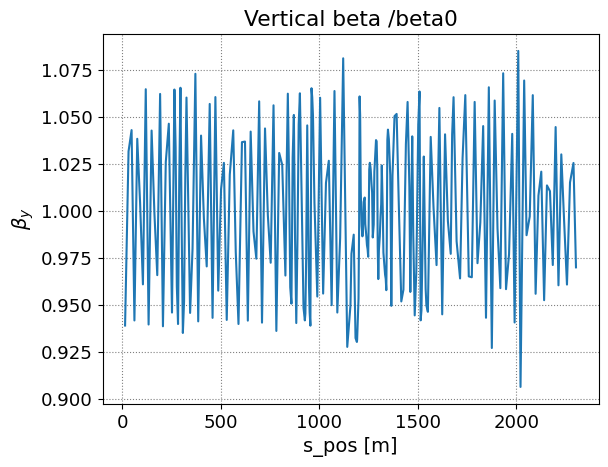

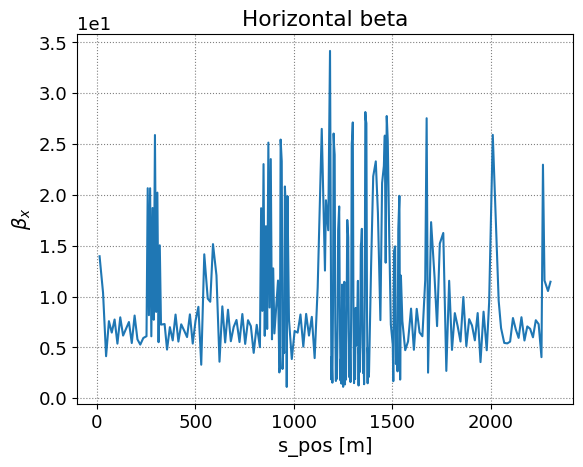

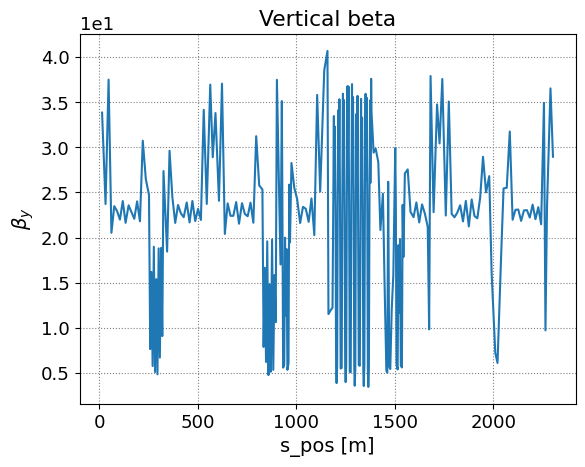

In [6]:
print(" BPM_to_corrector_response_matrices (Model) ..")
Cx0, Cxy0= ORM_x1(correctors_kick, ring,sorted(hcm_index), bpm_indices)
Cy0, Cyx0= ORM_y1(correctors_kick, ring, sorted(vcm_index), bpm_indices)

Y = 10* transpose(ORM_230426_1)

X = np.zeros((Cx0.shape[0]+Cy0.shape[0], Cx0.shape[1]+Cy0.shape[1]))
X[:Cx0.shape[0], :Cx0.shape[1]] = Cx0
X[:Cx0.shape[0], Cx0.shape[1]:] = Cxy0
X[Cx0.shape[0]:, :Cx0.shape[1]] = Cyx0
X[Cx0.shape[0]:, Cx0.shape[1]:] = Cy0

J = np.load('j_quads_p3_p_norm_old.npy')
J = np.transpose(J, (0, 2, 1))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow((X))
plt.title('Model ORM')
plt.subplot(1, 2, 2)
plt.imshow((Y), cmap='cividis')
plt.title('Measured ORM')
plt.tight_layout()
plt.show()

bpm_noisex = Noise_BPMx_230426_1/1000
min_value = np.min(abs(bpm_noisex))
bpm_noisex /= min_value
sigmax = bpm_noisex

bpm_noisey = Noise_BPMy_230426_1/1000
min_value = np.min(abs(bpm_noisey))
bpm_noisey /= min_value
sigmay = bpm_noisey
sigma = np.concatenate((sigmax, sigmay))
diagonal_values = 1 / np.square(sigma)
W = np.diag(diagonal_values)
print(W)

quadsOrds = quads_indices
used_bpm1 = bpm_indices
used_bpm2 = bpm_indices
used_correctors1 = sorted(hcm_index)
used_correctors2 = sorted(vcm_index)
quads =  len(quads_indices)
cor =  len(used_correctors1) + len(used_correctors2)
bpm = len(used_bpm1) + len(used_bpm2)

total_length = bpm + cor + quads
lengths = [quads ,cor,  bpm]
including_fit_parameters = ['quads', 'cor', 'bpm']

#j_cor = np.zeros((cor, X.shape[0],X.shape[1]))
#for i in range(cor):
#    j_cor[i] = X
#j_bpms = np.zeros((bpm, X.shape[0], X.shape[1]))
#for i in range(bpm):
#    j_bpms[i] = X

j_cor = np.load('j_cor_p3_old.npy')
j_cor = np.transpose(j_cor, (0, 2, 1))

j_bpms = np.load('j_bpms_p3_old.npy')
j_bpms = np.transpose(j_bpms, (0, 2, 1))

J1 = np.zeros((lengths[0]+lengths[1]+lengths[2], Cx0.shape[0]+Cy0.shape[0], Cx0.shape[1]+Cy0.shape[1]))

J1[:lengths[0]]=J
J1[lengths[0] : lengths[0] + lengths[1]]= j_cor
J1[lengths[0]+ lengths[1]:]= j_bpms

initial_guess = np.zeros(total_length)
initial_guess[:lengths[0]]= 0
initial_guess[lengths[0]:lengths[0] + lengths[1] ]= 0
initial_guess[lengths[0] + lengths[1] :] = 0

#Nk = len(J1)
#A = np.zeros([Nk, Nk])
#for i in range(Nk):
        #print('done A:', 100.* i ,'%')
#        for j in range(Nk):
#            A[i, j] = np.sum(np.dot(np.dot(J1[i], W), J1[j].T))

#np.save('matrix_A_W_bpm_cor_old.npy', A)
A = np.load('matrix_A_W_bpm_cor_old.npy')

u, s, v = np.linalg.svd(A, full_matrices=True)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.xlabel('singular values')
plt.ylabel('$\log(\sigma_i)$')
plt.show()

smat = 0.0 * A
si = s ** -1
n_sv = 400 # Cut off
si[n_sv:] *= 0.0
Nk = len(J1)
smat[:Nk, :Nk] = np.diag(si)
Jt = np.dot(v.transpose(), np.dot(smat.transpose(), u.transpose()))


fit_parameters  = loco_correction(lambda delta_params: objective(delta_params, X, Y, J, lengths, including_fit_parameters, W),initial_guess,X, Y, J1,Jt, lengths,including_fit_parameters
                         , verbose=2, max_iterations= 100, eps=1e-6, method='ng',W= W)
dg1  = fit_parameters[:lengths[0]]
dx1 = fit_parameters[lengths[0]:lengths[0] + lengths[1] ]
dy1 = fit_parameters[lengths[0] + lengths[1] :]

def setCorrection(ring, r ,quadInd):
    for i in range(len(quadInd)):
        qInd = quadInd[i]
        ring[qInd].K -= -r[i]

setCorrection(ring, dg1 , quads_indices)
_, _, twiss_cor = at.get_optics(ring, bpm_indices)

bx_rms_cor, by_rms_cor = getBetaBeat(ring, twiss, bpm_indices, makeplot = True)
s_pos = twiss_cor.s_pos
Beta_x = twiss_cor.beta[:, 0]
Beta_y = twiss_cor.beta[:, 1]

print('RESULTS:')
print(' Hor beta beating', bx_rms_cor *100, '%', 'Ver beta beating', by_rms_cor* 100)

_, _, twiss_error = at.get_optics(ring, quads_indices)
s_pos = twiss_error.s_pos
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 2))
ax.scatter(s_pos, dg1, label='Relative quadrupoles  strength', color='tab:gray', marker='x')
ax.set_xlabel("s_pos [m]", fontsize=14)
ax.set_ylabel(r'$\Delta k/ k$', fontsize=14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.grid(True, which='both', linestyle=':', color='gray')
ax.legend(loc="upper left", fontsize=10, frameon=True)
#plt.title('Obtained relative strengths of quadrupoles using LOCO')
plt.show()

_, _, twiss_error = at.get_optics(ring, bpm_indices)
s_pos = twiss_error.s_pos
Beta_x = twiss_error.beta[:, 0]
Beta_y = twiss_error.beta[:, 1]
bx = np.array((twiss_error.beta[:, 0] ) / twiss.beta[:, 0])
by = np.array((twiss_error.beta[:, 1] ) / twiss.beta[:, 1])
bx_rms = np.sqrt(np.mean(bx ** 2))
by_rms = np.sqrt(np.mean(by ** 2))

plt.rc('font', size=13)
fig, ax = plt.subplots()
ax.plot(s_pos, bx)
ax.set_xlabel("s_pos [m]", fontsize=14)
ax.set_ylabel(r'$\beta_x%$', fontsize=14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.grid(True, which='both', linestyle=':', color='gray')
plt.title('Horizontal beta /beta0')
plt.show()
fig, ax = plt.subplots()
ax.plot(s_pos, by)
ax.set_xlabel("s_pos [m]", fontsize=14)
ax.set_ylabel(r'$\beta_y%$', fontsize=14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.grid(True, which='both', linestyle=':', color='gray')
plt.title('Vertical beta /beta0')
plt.show()



plt.rc('font', size=13)
fig, ax = plt.subplots()
ax.plot(s_pos, Beta_x)
ax.set_xlabel("s_pos [m]", fontsize=14)
ax.set_ylabel(r'$\beta_x%$', fontsize=14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.grid(True, which='both', linestyle=':', color='gray')
plt.title('Horizontal beta')
plt.show()
fig, ax = plt.subplots()
ax.plot(s_pos, Beta_y)
ax.set_xlabel("s_pos [m]", fontsize=14)
ax.set_ylabel(r'$\beta_y%$', fontsize=14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.grid(True, which='both', linestyle=':', color='gray')
plt.title('Vertical beta')
plt.show()